# Exercises for KSS

## Exercise 1: Context

**a. Sketch a contextsensitive Application**
My application has an alarm clock function, that retrieves your appointments from your calender to wake you up one hour before the appointment. It will also check the distance to your appointment and wake you up earlier if neccessary.

**b. Categorize it according to Schilit (explain why)**
The wake up function, is triggered automatically by calendar entry and notices the user about the time to wake up. So it is *automatic contextual reconfiguration*.

**c. Categorize all relevant context regarding category of context, passive/active and primary/secondary**
- Active Context is everything that changes the application's bahavior (critical) -> the calender state and its entries are active context, because depending on it, the application will select the right time to wake up. If there is nothing to do one the weekends, you can sleep in. 
- Passive Context is the context in which an application event occurs and that is interesting to the user (relevant) ->  the application event to wake you up occurs a certain time before the appointment, while you are still asleep, so it is relevant to the user to be waked up but doesn't make any difference to the application's behaviour.
- Primary Context is everything that can be measured by sensors or retrieved in any way from the environment -> retrieving the time of and the distance to the appointment is primary context 
- Secondary Context is knowledge derived from primary context -> the application calculates how long it will take to get to the appointment, so the time is derived from the knowledge about the location/distance. 

**d. Modify a. to be in another class according to Schilit (Tip: You may modify the previous answer if this does not work)**
The alarm will also send a signal to the coffee machine to turn it on. So the coffee is ready as soon as you stood up ;)
Turning on the coffee machine is again triggered automatically by the alarm/time. But the context triggers a real world action and can therefore be categorized as *context-triggered action*.




## Exercise 2: Sensors
-> see training.html

## Exercise 3: Calculating features

### Load Data from API

c. Use InfluxDBr2 to load the data that you collected in excercise 2 into an xts object (use one xts per label and experiment) 

-> Use Node.js Backend and API to get Data via influent

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pylab import rcParams
import numpy as np


from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from pandas.plotting import radviz

import warnings
warnings.simplefilter('ignore')

rcParams['figure.figsize'] = 10, 10

In [2]:
response = requests.get("http://localhost:3000/influent")
dict = response.json()['results'][0]['series'][0]
df = pd.DataFrame(data=dict['values'], columns=dict['columns'])
df = df.drop(['time', 'subject'], axis=1)
df['activity'] = df['activity'].str.strip()

In [3]:
df.describe()

,alpha,beta,gamma,stamp,x,y,z
count,6912.000000,6912.000000,6912.000000,6.912000e+03,6912.000000,6912.000000,6912.000000
mean,1.371952,-1.213033,-0.383226,1.570376e+12,0.119187,-1.493433,1.026851
std,114.813671,36.139308,40.662070,8.081357e+05,2.407892,6.991603,8.553057
min,-801.887390,-454.508118,-220.332947,1.570375e+12,-22.911385,-43.214783,-41.941494
25%,-11.593399,-7.428623,-7.768493,1.570376e+12,-0.382254,-2.195655,-0.562176
50%,-0.251788,-0.124146,0.116277,1.570377e+12,-0.005265,-0.022186,0.007377
75%,12.911134,8.331957,9.754166,1.570377e+12,0.420981,0.075503,1.120725
max,607.206238,364.143280,274.052979,1.570377e+12,26.011105,35.629875,36.468456


In [37]:
response = requests.get("http://localhost:3000/influent")
dict = response.json()['results'][0]['series'][0]
df2 = pd.DataFrame(data=dict['values'], columns=dict['columns'])
df2['activity'] = df2['activity'].str.strip()
df2

,time,activity,alpha,beta,gamma,stamp,subject,x,y,z
0,2019-10-06T15:15:25.700303176Z,Resting,0.000000,0.000000,0.000000,1570374923766,empty,0.000000,0.000000,0.000000
1,2019-10-06T15:15:25.700577192Z,Resting,0.088301,-0.220315,-0.094421,1570374923821,empty,-0.002889,0.022908,0.514943
2,2019-10-06T15:15:25.700940365Z,Resting,0.858527,0.618979,-0.234303,1570374924290,empty,0.026472,0.005218,0.054518
3,2019-10-06T15:15:25.700978614Z,Resting,0.368939,0.128517,-0.374185,1570374924228,empty,-0.000056,-0.016999,0.057604
4,2019-10-06T15:15:25.701022083Z,Resting,-0.051582,-0.780718,-0.094421,1570374924083,empty,0.006810,0.012668,0.020030
5,2019-10-06T15:15:25.701045716Z,Resting,0.788586,-0.011365,0.046336,1570374924186,empty,0.016333,-0.041911,0.046790
6,2019-10-06T15:15:25.701085822Z,Resting,0.578763,-0.361071,-0.094421,1570374924133,empty,-0.009588,-0.012702,0.072942
7,2019-10-06T15:15:25.701106086Z,Resting,0.718645,-0.151248,0.256159,1570374924026,empty,0.011144,0.013469,0.065406
8,2019-10-06T15:15:25.701166185Z,Resting,0.578763,0.479097,-0.023605,1570374923880,empty,-0.006763,0.002137,0.137691
9,2019-10-06T15:15:25.701191445Z,Resting,0.088301,-0.361071,0.046336,1570374923927,empty,0.006527,-0.002869,0.090684


In [4]:
df.groupby(['activity']).count()

,alpha,beta,gamma,stamp,x,y,z
activity,,,,,,,
Jumping,2300,2300,2300,2300,2300,2300,2300
Resting,2307,2307,2307,2307,2307,2307,2307
Walking,2305,2305,2305,2305,2305,2305,2305


In [5]:
df.groupby(['activity']).mean()

,alpha,beta,gamma,stamp,x,y,z
activity,,,,,,,
Jumping,0.846996,-3.312687,-2.141838,1.570376e+12,0.399051,-4.360662,2.809627
Resting,-0.309516,-0.176518,0.091773,1.570376e+12,-0.006088,0.017402,0.005368
Walking,3.578696,-0.155346,0.896159,1.570376e+12,-0.034688,-0.144570,0.270313


### Store Data as CSV

In [6]:
df.to_csv(r'../data.csv', index=False)

### Visualizing Feature Space 

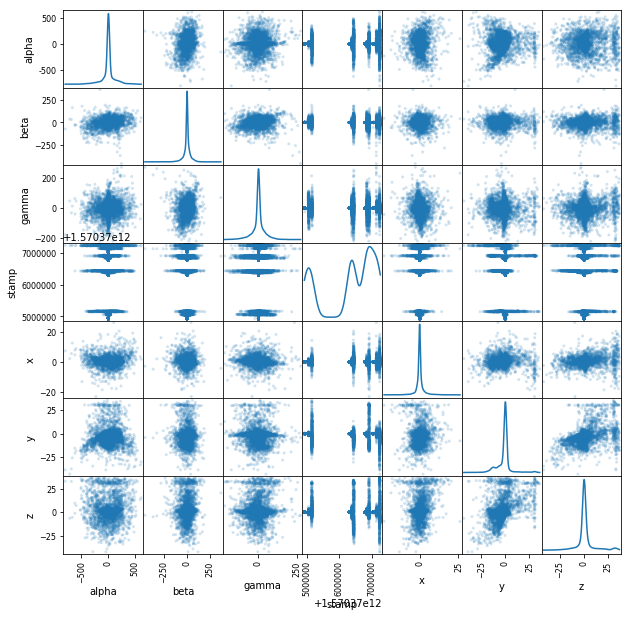

In [7]:
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde');

In [8]:
df.corr()

,alpha,beta,gamma,stamp,x,y,z
alpha,1.000000,0.205362,0.076343,0.009595,0.038266,0.020021,0.024264
beta,0.205362,1.000000,0.127825,-0.041451,-0.067081,-0.009779,0.020964
gamma,0.076343,0.127825,1.000000,-0.027785,-0.074914,-0.052173,0.057799
stamp,0.009595,-0.041451,-0.027785,1.000000,0.027047,-0.076769,0.001600
x,0.038266,-0.067081,-0.074914,0.027047,1.000000,0.003897,0.196094
y,0.020021,-0.009779,-0.052173,-0.076769,0.003897,1.000000,0.380771
z,0.024264,0.020964,0.057799,0.001600,0.196094,0.380771,1.000000


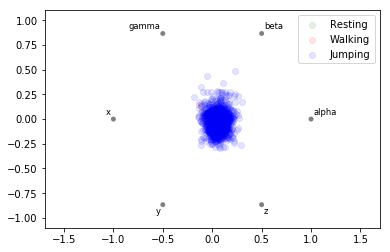

In [9]:
df_tmp = df.drop(['stamp'], axis=1, inplace=False)
radviz(df_tmp, class_column='activity', alpha=0.1, color=['green', 'red', 'blue'])

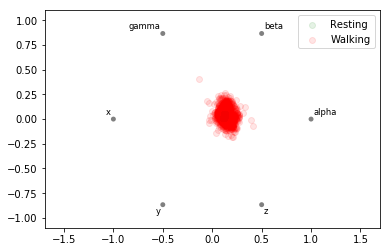

In [10]:
radviz(df_tmp[df_tmp['activity'] != 'Jumping'], class_column='activity', alpha=0.1, color=['green', 'red', 'blue'])

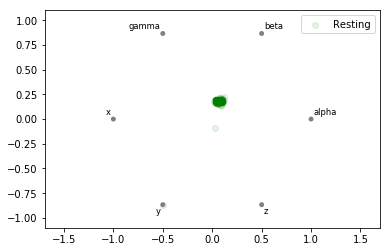

In [11]:
radviz(df_tmp[df_tmp['activity'] == 'Resting'], class_column='activity', alpha=0.1, color=['green', 'red', 'blue'])

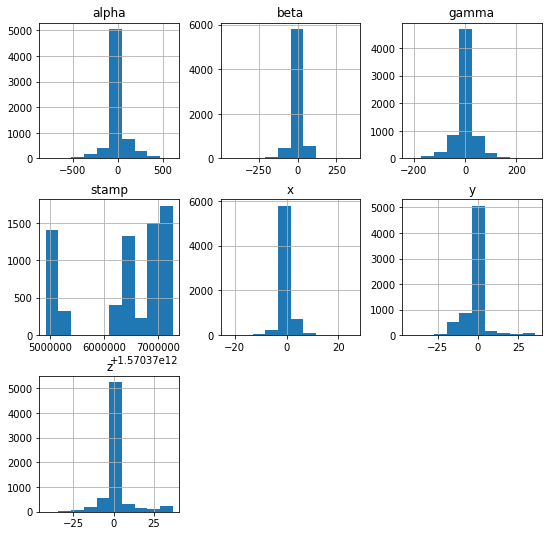

In [12]:
df.hist(figsize=(9,9))
plt.show()

### Windowing
Apply a non-overlapping window of 1s to the data.

In [13]:
X = []
y = []

skip_count = 0
class_names = []
colors = ['red', 'green', 'blue']

def visualize_column(column):
    for i, activity in enumerate(df['activity'].unique()[::-1]):
        for index in np.arange(0, (df['activity'] == activity).shape[0], 20):
            window = df[(df['activity'] == activity)][index:index+20]
            plt.plot(range(window.shape[0]), window[column], c=colors[i], alpha=0.2)
            
    plt.title(column)
    plt.legend(handles=[mpatches.Patch(color=color, label=name) for name, color in zip(class_names, colors)]);
    plt.show()

for i, activity in enumerate(df['activity'].unique()[::-1]):
    print(activity)
    class_names.append(activity)
    for index in np.arange(0, (df['activity'] == activity).shape[0], 20):
        window = df[(df['activity'] == activity)][index:index+20]
            
        if window.shape[0] < 1:
            skip_count += 1
            continue;
        row = [
            window['alpha'].mean(),
            window['beta'].mean(),
            window['gamma'].mean(),
            window['x'].mean(),
            window['y'].mean(),
            window['z'].mean(),

            window['alpha'].var(),
            window['beta'].var(),
            window['gamma'].var(),
            window['x'].var(),
            window['y'].var(),
            window['z'].var()
        ]
        X.append(row)
        y.append(i)

Jumping
Walking
Resting


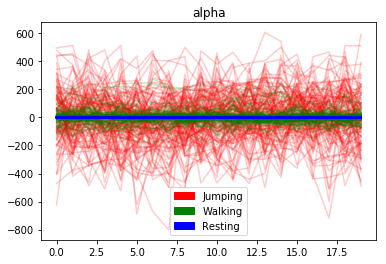

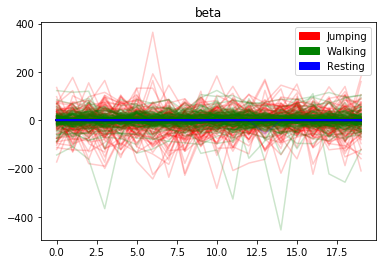

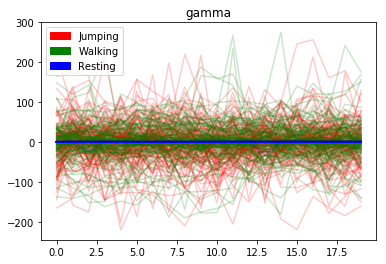

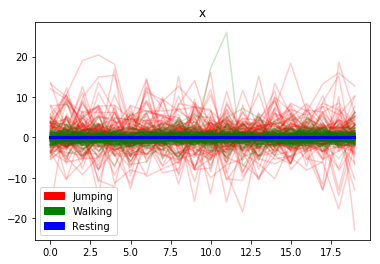

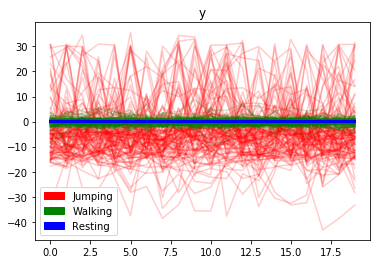

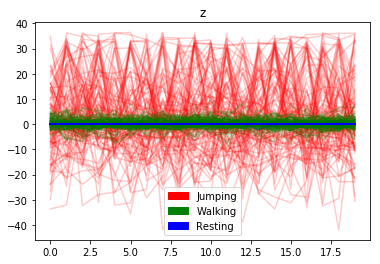

In [14]:
# visualize frames

for column_name in df:
    if column_name not in ('stamp', 'activity'):
        visualize_column(column_name)

In [15]:
X_data = pd.DataFrame(X, columns=['alpha_mean', 'beta_mean', 'gamma_mean',
                                  'x_mean', 'y_mean', 'z_mean',
                                  'alpha_var', 'beta_var', 'gamma_var',
                                  'x_var', 'y_var', 'z_var'])

X_data.describe()

,alpha_mean,beta_mean,gamma_mean,x_mean,y_mean,z_mean,alpha_var,beta_var,gamma_var,x_var,y_var,z_var
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,1.622392,-1.158173,-0.341813,0.119870,-1.486194,1.025101,13104.132987,1157.138864,1111.975986,5.552839,39.740829,71.366950
std,26.661853,14.348893,24.357936,0.720182,3.312139,2.252867,27481.648531,2066.921840,1876.289916,10.690054,84.964783,143.736233
min,-121.031782,-112.257886,-125.282805,-1.756754,-18.962383,-6.444785,0.075211,0.041235,0.002822,0.000057,0.000068,0.000114
25%,-0.855402,-2.774456,-4.324460,-0.122092,-1.628454,-0.000147,0.216351,0.132073,0.029847,0.000320,0.000341,0.000358
50%,-0.176776,-0.190896,0.127555,-0.000472,-0.042426,0.051089,678.808295,333.207386,374.906078,0.596907,1.077819,2.660969
75%,5.872651,2.089514,4.151946,0.278852,0.044194,1.254843,14064.024778,1241.930794,1487.785478,6.447453,23.503646,70.883755
max,193.238049,66.760520,98.858737,4.658726,5.431473,13.485479,195875.961585,17213.234983,19325.565742,69.980857,411.639333,735.362984


In [16]:
?plt.legend

In [17]:
y_data = np.array(y)

In [18]:
# count unique labels
np.unique(y_data, return_counts=True)

(array([0, 1, 2]), array([115, 116, 116]))

### Visualize again after Windowing

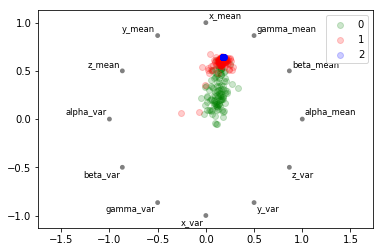

In [19]:
windowed = X_data.copy()
windowed['label'] = y_data
radviz(windowed, class_column='label', color=['green', 'red', 'blue'],alpha=0.2,)

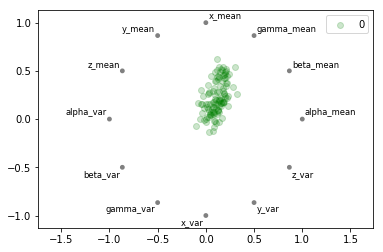

In [20]:
radviz(windowed[windowed['label'] == 0], class_column='label', alpha=0.2, color=['green', 'red', 'blue'])

## Exercise 4: Creating a predictor

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [23]:
clf = SVC()
param_dist = {
    'kernel': ['linear']
}

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=20, cv=10)

In [24]:
random_search.fit(X_train, y_train);
print(random_search.best_estimator_)
print(random_search.best_score_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.9819494584837545


In [25]:
y_pred = random_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9857142857142858

### Recursive Feature Elimination

In [26]:
from sklearn.feature_selection import RFE

In [27]:
selector = RFE(random_search.best_estimator_, 3, step=1)
selector = selector.fit(X_train, y_train)
print("Selector Support: {}".format(selector.support_))
print("Selector Ranking: {}".format(selector.ranking_))

Selector Support: [False False  True False False False  True False False False False  True]
Selector Ranking: [ 2  7  1 10  5  9  1  6  4  8  3  1]


In [28]:
print("Chosen features: {}".format(np.array(list(X_train))[selector.support_]))

Chosen features: ['gamma_mean' 'alpha_var' 'z_var']


### Retrain after RFE

In [29]:
# subset of dimensions

X_train_sub = X_train.iloc[:, selector.support_].copy()
X_test_sub = X_test.iloc[:, selector.support_].copy()

In [30]:
clf = SVC()
random_search = RandomizedSearchCV(clf, param_distributions={'kernel': ['linear']}, n_iter=20, cv=10)

random_search.fit(X_train_sub, y_train);
print(random_search.best_estimator_)
print(random_search.best_score_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.9927797833935018


In [31]:
y_pred = random_search.best_estimator_.predict(X_test_sub)
accuracy_score(y_test, y_pred)

0.9857142857142858

## Exercise 5: Write model to javascript

In [32]:
from sklearn_porter import Porter

In [33]:
porter = Porter(random_search.best_estimator_, language='JS')
output = porter.export(embed_data=True)
output

'var SVC = function(nClasses, nRows, vectors, coefficients, intercepts, weights, kernel, gamma, coef0, degree) {\n\n    this.nClasses = nClasses;\n    this.classes = new Array(nClasses);\n    for (var i = 0; i < nClasses; i++) {\n        this.classes[i] = i;\n    }\n    this.nRows = nRows;\n    this.vectors = vectors;\n    this.coefficients = coefficients;\n    this.intercepts = intercepts;\n    this.weights = weights;\n    this.kernel = kernel.toUpperCase();\n    this.gamma = gamma;\n    this.coef0 = coef0;\n    this.degree = degree;\n\n    this.predict = function(features) {\n    \n        var kernels = new Array(vectors.length);\n        var kernel;\n        switch (this.kernel) {\n            case \'LINEAR\':\n                // <x,x\'>\n                for (var i = 0; i < this.vectors.length; i++) {\n                    kernel = 0.;\n                    for (var j = 0; j < this.vectors[i].length; j++) {\n                        kernel += this.vectors[i][j] * features[j];\n        

In [34]:
# make minor changes to JS

output = output.replace('auto_deprecated', '"auto_deprecated"')
output = output.replace("this.classes = new Array(nClasses);\n    for (var i = 0; i < nClasses; i++) {\n        this.classes[i] = i;\n    }",
             "this.classes = " + str(class_names) + ";")
output = output.replace("typeof process !== \'undefined\' && typeof process.argv !== \'undefined\'", 'true')
output = output.replace("process.argv.length - 2 === 3", "true")
output = output.replace("process.argv.slice(2);", "[0,0,0];")
print(output)

var SVC = function(nClasses, nRows, vectors, coefficients, intercepts, weights, kernel, gamma, coef0, degree) {

    this.nClasses = nClasses;
    this.classes = ['Jumping', 'Walking', 'Resting'];
    this.nRows = nRows;
    this.vectors = vectors;
    this.coefficients = coefficients;
    this.intercepts = intercepts;
    this.weights = weights;
    this.kernel = kernel.toUpperCase();
    this.gamma = gamma;
    this.coef0 = coef0;
    this.degree = degree;

    this.predict = function(features) {
    
        var kernels = new Array(vectors.length);
        var kernel;
        switch (this.kernel) {
            case 'LINEAR':
                // <x,x'>
                for (var i = 0; i < this.vectors.length; i++) {
                    kernel = 0.;
                    for (var j = 0; j < this.vectors[i].length; j++) {
                        kernel += this.vectors[i][j] * features[j];
                    }
                    kernels[i] = kernel;
                }
                break

In [35]:
# write to file

with open("./public/classifier.js", "w") as inp:
    inp.write(output)

## Excercise 6: Creating a Javascript predictor
-> see classifier.js

## Excercise 7: Let the classifier make changes to your application

**a. make your web app context sensitive**
-> see app.html

**b. Think about further applications and write them down**
1. What other inputs from the browser can be used as "sensor"
    - Touch/Pointer Events
    - Proximity Events (experimental): device proximity sensor detects a change between the device and an object
    - Ambient Light Events (experimental): when the light sensor of a device detects a change in the light level
2. What are interesting contexts
    - Is the user at home? Is he maybe not sleeping at home and needs therefore a longer way to work
    - Is the user about to leave? Remind the user of something he needs during the day.
    - Did the user move enought during the day? Remind him to do sports in the evening.